## Observations and Insights 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [136]:
# Check the number of mice.
mice = combined_df['Mouse ID'].nunique()
print(f"The number of mice is {mice}. ")

The number of mice is 249. 


In [137]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup_check_df = pd.DataFrame(combined_df, columns = ['Mouse ID', 'Timepoint'])
duplicate_df = dup_check_df[dup_check_df.duplicated(keep = 'first')]


duplicate_df.head(20)

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [138]:
# Drop any duplicate rows
clean_df = combined_df.drop([combined_df.index[909],combined_df.index[911], combined_df.index[913],
                             combined_df.index[915],combined_df.index[917]]) 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [139]:
# Recheck the number of mice
mice_2 = clean_df['Mouse ID'].nunique()
print(f"The number of mice is {mice_2}. ")

The number of mice is 249. 


## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

count= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": standard_dv, "SEM": sem})

print(summary_df)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

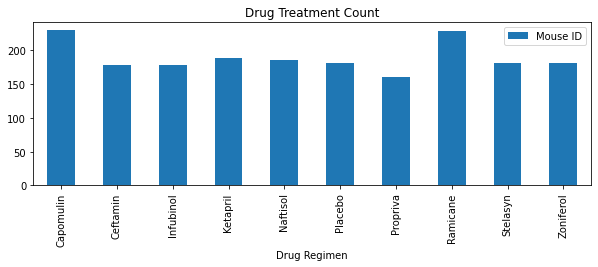

<Figure size 432x288 with 0 Axes>

In [141]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()


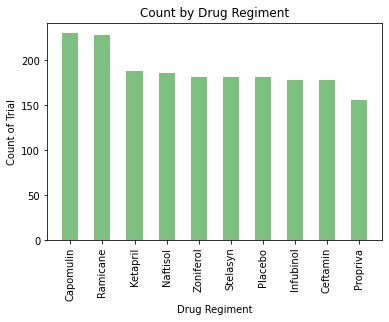

In [142]:
# Generate identical bar plot using pyplot instead of pandas.
drug_counts= clean_df["Drug Regimen"].value_counts()

#Creating variables for my axis
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, color='g', alpha=0.5, align= "center", width= .5)

#Formatting
plt.ylabel("Count of Trial")
plt.xlabel("Drug Regiment")
plt.title("Count by Drug Regiment")
plt.xticks(rotation=90)

plt.show()

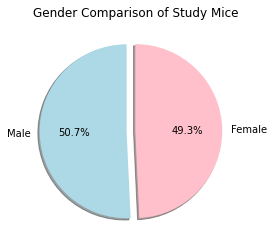

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=sex_count.index

#Values of each section 
sizes=sex_count.values

#Colors of each section

colors=["lightblue", "pink"]

#Exploiding the male column
explode=[0.1,0]

#Using Pandas to print
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison of Study Mice")
plt.show()


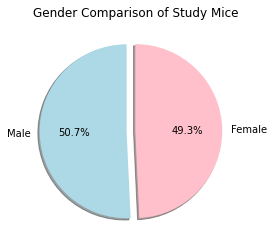

In [144]:
# Generate identical pie plot using pyplot

#Labels for each section
labels=sex_count.values

#Values of each section 
sizes=sex_count.values

#Colors of each section

colors=["lightblue", "pink"]

#Exploiding the male column

explode=[0.1,0]

#Make into a pie chart

sex_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison of Study Mice")
plt.ylabel(" ")
plt.show()


## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

tumor_vol=clean_df.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mice_data = tumor_vol[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')
mice_data.round(2)

mice_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [216]:
capomulin = mice_data.loc[mice_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = mice_data.loc[mice_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = mice_data.loc[mice_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = mice_data.loc[mice_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculate quartiles, IQR, and identify potential outliers for each regimen.

treatment_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
lower_bound = []
upper_bound = []

#For each of the 4 treatements
#Capomulin
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Determine upper and lower bounds
lower_bound.append(lowerq - (1.5*iqr))
upper_bound.append(upperq + (1.5*iqr))
    
#Ramicane
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Determine upper and lower bounds
lower_bound.append(lowerq - (1.5*iqr))
upper_bound.append(upperq + (1.5*iqr)) 
    
#Infubinol
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Determine upper and lower bounds
lower_bound.append(lowerq - (1.5*iqr))
upper_bound.append(upperq + (1.5*iqr))

#Ceftamin
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Determine upper and lower bounds
lower_bound.append(lowerq - (1.5*iqr))
upper_bound.append(upperq + (1.5*iqr))   

# Print a filtered dataframe of any outliers
stats_df = {"Treatment Name": treatment_name, "Lower Bound": lower_bound, "Upper Bound": upper_bound}
stats_df = pd.DataFrame(stats_df)
stats_df

,Treatment Name,Lower Bound,Upper Bound
0,Capomulin,20.704562,51.832015
1,Ramicane,17.912664,54.306811
2,Infubinol,36.832905,82.741446
3,Ceftamin,25.355450,87.666458


In [187]:
lower = mice_data.groupby('Drug Regimen').agg(lambda x: np.percentile(x['6'], q = 25))



KeyError: '6'

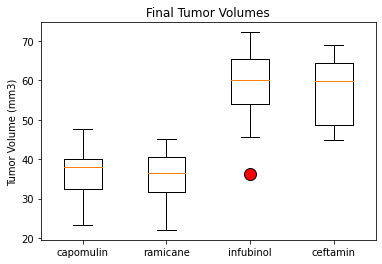

In [176]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights